In [5]:
from thermal_comfort import heat_index, heat_index_extended
import numpy as np
from pythermalcomfort.models import heat_index as hi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
hi(30, 50).hi.item()

31.0

In [7]:
ta = np.linspace(0, 50, 22)
rh = np.linspace(0, 100, 11)

normal = []
extended = []
hi_pytherm = []
ta_l = []
rh_l = []


for t in ta:
    for r in rh:
        normal.append(heat_index(t, r))
        extended.append(heat_index_extended(t, r))
        hi_pytherm.append(hi(t, r).hi.item())
        ta_l.append(t)
        rh_l.append(r)

df = pd.DataFrame({'ta': ta_l, 'rh': rh_l, 'original unbound': hi_pytherm, 'original': normal, 'corrected': extended})
df = df.melt(id_vars=['ta', 'rh'])
df

,ta,rh,variable,value
0,0.0,0.0,original unbound,-8.800000
1,0.0,10.0,original unbound,13.000000
2,0.0,20.0,original unbound,31.400000
3,0.0,30.0,original unbound,46.600000
4,0.0,40.0,original unbound,58.500000
...,...,...,...,...
721,50.0,60.0,corrected,113.954799
722,50.0,70.0,corrected,133.736690
723,50.0,80.0,corrected,155.697215
724,50.0,90.0,corrected,179.836374


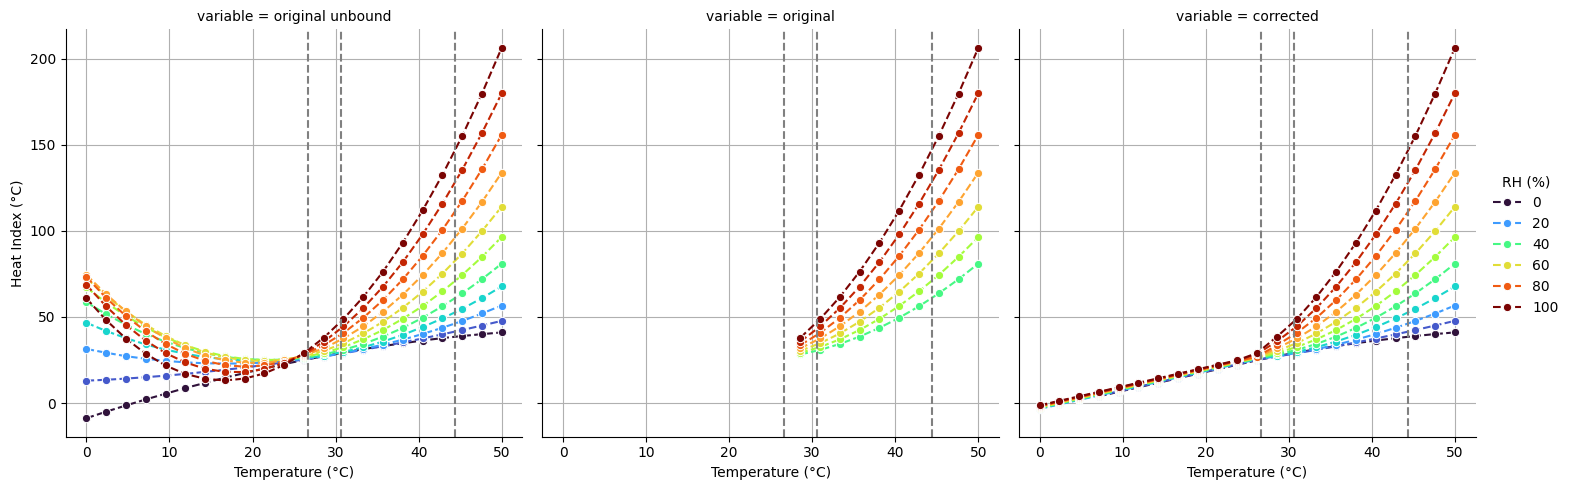

In [8]:
g = sns.FacetGrid(data=df, col='variable', height=5)
g.map_dataframe(sns.lineplot, x='ta', y='value', hue='rh', palette='turbo', linestyle='--', marker='o')
g.add_legend(title='RH (%)')
for ax in g.axes.flat:
    ax.axvline(26.666, color='gray', linestyle='--')
    ax.axvline(44.4, color='gray', linestyle='--')
    ax.axvline(30.6, color='gray', linestyle='--')
    ax.set_axisbelow(True)
    ax.grid(True)
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Heat Index (°C)')
